# Import software libraries and load the dataset #

In [1]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import seaborn as sb                   # Perform data visualization.
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets

# Load the dataset.
iris = datasets.load_iris()
print('Loaded {} records.'.format(len(iris.data)))

Loaded 150 records.


# The dataset #

In [31]:
# Convert array to pandas DataFrame.
data_raw = pd.DataFrame(iris['data'], columns = iris['feature_names'])
data_raw['target'] = iris['target']

print(data_raw.info())      # View data types and see if there are missing entries.
data_raw.head(10)           # View first 10 records.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Summary 

In [32]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(data_raw.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean                5.84              3.06               3.76   
std                 0.83              0.44               1.77   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  target  
count            150.00  150.00  
mean               1.20    1.00  
std                0.76    0.82  
min                0.10    0.00  
25%                0.30    0.00  
50%                1.30    1.00  
75%                1.80    2.00  
max                2.50    2.00  


# Identify outliers

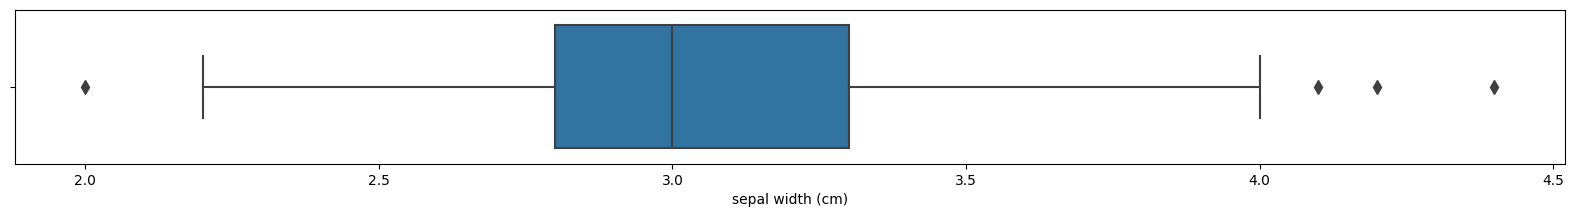

In [33]:
plt.figure(figsize = (20, 2))
bplot = sb.boxplot(x = 'sepal width (cm)', data = data_raw, orient = 'h', fliersize = 7)

# Reduce the dimensionality of the dataset

In [34]:
X = iris['data'][:, :2]  # Only use first two features (sepal length and sepal width).
y = iris['target']

print("\nBefore reduction:")
print("X dataset dimensions are", X.shape)
print("y dataset dimensions are", y.shape)

# Only use labels 0 and 1 (setosa and versicolor).
class_labels = (y == 0) | (y == 1)
X = X[class_labels]
y = y[class_labels]

print("\nAfter reduction:")
print("X dataset dimensions are", X.shape)
print("y dataset dimensions are", y.shape)


Before reduction:
X dataset dimensions are (150, 2)
y dataset dimensions are (150,)

After reduction:
X dataset dimensions are (100, 2)
y dataset dimensions are (100,)


# Examine the separation between classes using a scatter plot

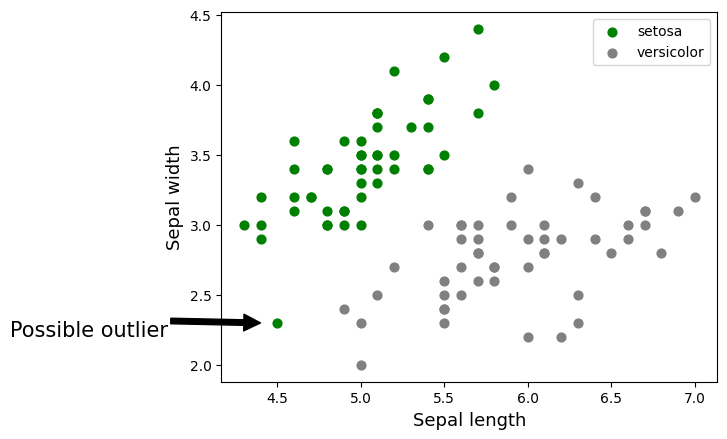

In [35]:
# Sepal length along x-axis, sepal width along y-axis.
scatter_x = X[:, 0]
scatter_y = X[:, 1]

cdict = {0: 'green', 1: 'grey'}

# Generate scatter plot with legend.
for c_label in np.unique(y):
    if c_label == 0:
        iris = 'setosa'
    if c_label == 1:
        iris = 'versicolor'
    
    ix = np.where(y == c_label)
    plt.scatter(scatter_x[ix], scatter_y[ix], c = cdict[c_label], label = iris, s = 40)
    
plt.legend()
plt.xlabel("Sepal length", fontsize = 13)
plt.ylabel("Sepal width", fontsize = 13)
plt.annotate('Possible outlier', xy = (4.4, 2.3), xytext = (2.9, 2.2),
             arrowprops = dict(color= 'black'), fontsize = 15);

# Plot a decision boundary for a given model

In [36]:
def plot_decision_boundary(X, y, model, is_svm):
    scatter_x = X[:, 0]
    scatter_y = X[:, 1]

    cdict = {0: 'green', 1: 'grey'}

    for c_label in np.unique(y):
        if c_label == 0:
            iris = 'setosa'
        if c_label == 1:
            iris = 'versicolor'

        ix = np.where(y == c_label)
        plt.scatter(scatter_x[ix], scatter_y[ix], c = cdict[c_label], label = iris, s = 40)
        
    plt.legend()
    plt.xlabel("Sepal length", fontsize = 13)
    plt.ylabel("Sepal width", fontsize = 13)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid.
    xx = np.linspace(xlim[0], xlim[1], 40)
    yy = np.linspace(ylim[0], ylim[1], 40)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)  # Use model decision function to plot boundary.
    
    if is_svm == True:
        # Plot decision boundary and margins.
        ax.contour(XX, YY, Z, colors = 'r', levels = [-1, 0, 1], 
                   linestyles=['--', '-', '--'])
        
        # Plot support vectors.
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s = 100, linewidth = 1, facecolors = 'none', edgecolors = 'k')
    else:
        ax.contour(XX, YY, Z, colors = 'r', levels = [0], 
                   linestyles=['-'])
        
    plt.show()
    
print('Function to plot the decision boundary has been defined.')

Function to plot the decision boundary has been defined.


# Train a basic logistic regression model and plot its decision boundary

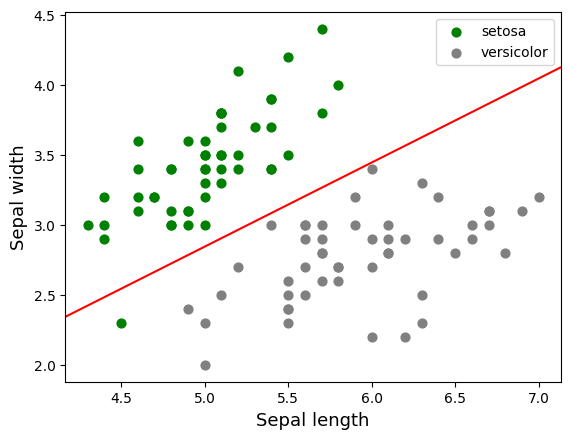

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'liblinear', random_state = 1936)
log_reg.fit(X, y);

plot_decision_boundary(X, y, log_reg, False)

# Train an SVM model and plot its decision boundary plus margins

- **C** is the regularization penalty that determines the "wideness" of the road (its margins). 
  - A higher penalty leads to narrower margins (see the examples for C=100 and C=0.1.
(see: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)


- The solid red line is the decision boundary.
- The dashed red lines are the support-vector margins.
- The **circled data points are the support vectors**

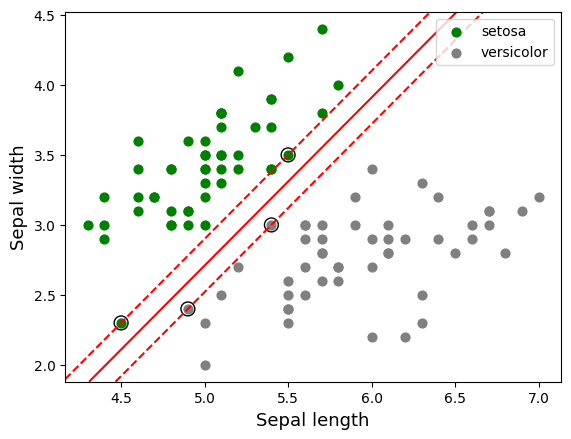

In [38]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 100, random_state = 1936)
svm.fit(X, y)

plot_decision_boundary(X, y, svm, True)

# Reduce the regularization penalty to soften the margin

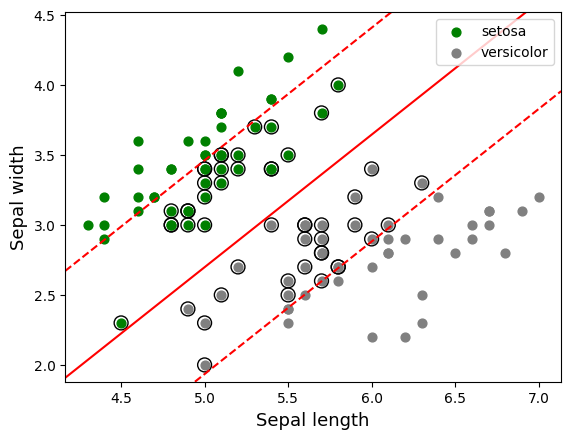

In [39]:
svm = SVC(kernel = 'linear', C = 0.1, random_state = 1936)
svm.fit(X, y)

plot_decision_boundary(X, y, svm, True)

# Split the datasets

In [40]:
from sklearn.model_selection import train_test_split

label_columns = ['target']

training_columns = ['sepal length (cm)', 'sepal width (cm)' , 'petal length (cm)', 'petal width (cm)']

# Split the training and test datasets and their labels.
X_train, X_test, y_train, y_test = train_test_split(data_raw[training_columns],
                                                                            data_raw[label_columns],
                                                                            random_state = 1936)

print('The training and test datasets and their labels have been split.')

The training and test datasets and their labels have been split.


# Evaluate an SVM model using a holdout test set

In [47]:
svm = SVC(kernel = 'linear', C = 100, random_state = 1936)
svm.fit(X_train, np.ravel(y_train))

# Score using the test data.
score = svm.score(X_test, y_test)

print('Accuracy: {:.0f}%'.format(score * 100))

# Hint: Evaluate the model using other metrics (precision, recall, ...).

Accuracy: 92%


# Optimize the SVM model with grid search and cross-validation

In [48]:
from sklearn.model_selection import GridSearchCV

svm = SVC(gamma = 'auto', random_state = 1936)

grid = [{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
         'C': [0.01, 0.1, 1, 5, 10, 25, 50, 100]}]

search = GridSearchCV(svm, param_grid = grid, scoring = 'accuracy', cv = 5)
search.fit(X_train, np.ravel(y_train));

print(search.best_params_)

{'C': 0.01, 'kernel': 'poly'}


In [49]:
# Score using the test data.
score = search.score(X_test, y_test)

print('Accuracy: {:.0f}%'.format(score * 100))

Accuracy: 95%


# Examine the optimized SVM model's predictions

In [50]:
# Use test set to evaluate.
results_comparison = X_test.copy()
results_comparison['Predicted Iris'] = search.predict(X_test)
results_comparison['Actual Iris'] = y_test.copy()

# Map labels to actual Iris names.
iris_encode = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    
results_comparison['Predicted Iris'] = results_comparison['Predicted Iris'].map(iris_encode)
results_comparison['Actual Iris'] = results_comparison['Actual Iris'].map(iris_encode)

# View examples of the predictions compared to actual Iris.
results_comparison.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predicted Iris,Actual Iris
121,5.6,2.8,4.9,2.0,virginica,virginica
67,5.8,2.7,4.1,1.0,versicolor,versicolor
148,6.2,3.4,5.4,2.3,virginica,virginica
77,6.7,3.0,5.0,1.7,versicolor,versicolor
31,5.4,3.4,1.5,0.4,setosa,setosa
7,5.0,3.4,1.5,0.2,setosa,setosa
5,5.4,3.9,1.7,0.4,setosa,setosa
127,6.1,3.0,4.9,1.8,virginica,virginica
146,6.3,2.5,5.0,1.9,virginica,virginica
35,5.0,3.2,1.2,0.2,setosa,setosa
